In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams["figure.figsize"] = (18, 10)

In [ ]:
df = pd.read_csv('/content/adult_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
gender_counts = df['sex'].value_counts()
print(gender_counts)

sex
Male      21790
Female    10771
Name: count, dtype: int64


In [ ]:
# Фильтруем только мужчин
men = df[df['sex'] == 'Male']

# Считаем средний возраст мужчин
mean_age_men = men['age'].mean()

print(f"Средний возраст мужчин: {mean_age_men:.2f}")

Средний возраст мужчин: 39.43


In [ ]:
# Подсчёт количества людей с гражданством Тайвань
taiwan_count = df[df['native-country'] == 'Taiwan'].shape[0]

# Общее количество людей в датасете
total_count = df.shape[0]

# Вычисляем процент
taiwan_percent = (taiwan_count / total_count) * 100

print(f"Процент людей, являющихся гражданами Тайваня: {taiwan_percent:.2f}%")

Процент людей, являющихся гражданами Тайваня: 0.16%


In [ ]:
# Фильтруем людей с доходом >50K (считается, что значение в столбце 'income' — строка '>50K')
high_salary = df[df['salary'] == '>50K']

# Вычисляем средний возраст
mean_age_high_salary = high_salary['age'].mean()

print(f"Средний возраст людей с доходом >50K: {mean_age_high_salary:.2f}")

Средний возраст людей с доходом >50K: 44.25


In [ ]:
# Фильтруем людей с доходом >50K
high_salary = df[df['salary'] == '>50K']

# Вычисляем стандартное отклонение возраста
std_age_high_salary = high_salary['age'].std()

print(f"Стандартное отклонение возраста людей с доходом >50K: {std_age_high_salary:.2f}")

Стандартное отклонение возраста людей с доходом >50K: 10.52


In [ ]:
# Уровни образования "Bachelors и выше"
high_edu_levels = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']

# Выбираем людей с доходом >50K
high_salary = df[df['salary'] == '>50K']

# Проверяем, все ли имеют образование из списка high_edu_levels
all_high_edu = high_salary['salary'].isin(high_edu_levels).all()

if all_high_edu:
    print("Все люди с доходом >50K имеют образование Bachelors или выше.")
else:
    print("Не все люди с доходом >50K имеют образование Bachelors или выше.")

Не все люди с доходом >50K имеют образование Bachelors или выше.


In [ ]:
# Фильтрация по условиям:
# 1) Работают 40 часов в неделю
# 2) Страна - United-States
# 3) Доход <=50K
filtered = df[
    (df['hours-per-week'] == 40) &
    (df['native-country'] == 'United-States') &
    (df['salary'] == '<=50K')
]

count_people = filtered.shape[0]

print(f"Количество человек, работающих 40 часов, являющихся гражданами США и зарабатывающих <=50K: {count_people}")

Количество человек, работающих 40 часов, являющихся гражданами США и зарабатывающих <=50K: 10493


In [ ]:
# Находим максимальное количество часов работы в неделю
max_hours = df['hours-per-week'].max()
print(f"Максимальное количество часов в неделю: {max_hours}")

# Отфильтруем людей, которые работают max_hours и зарабатывают <=50K
filtered = df[(df['hours-per-week'] == max_hours) & (df['salary'] == '<=50K')]

count_people = filtered.shape[0]
print(f"Количество человек, работающих {max_hours} часов в неделю и зарабатывающих <=50K: {count_people}")

Максимальное количество часов в неделю: 99
Количество человек, работающих 99 часов в неделю и зарабатывающих <=50K: 60


Распределение по уровню образования:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


/tmp/ipython-input-1661553690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.index, y=edu_counts.values, palette='viridis')


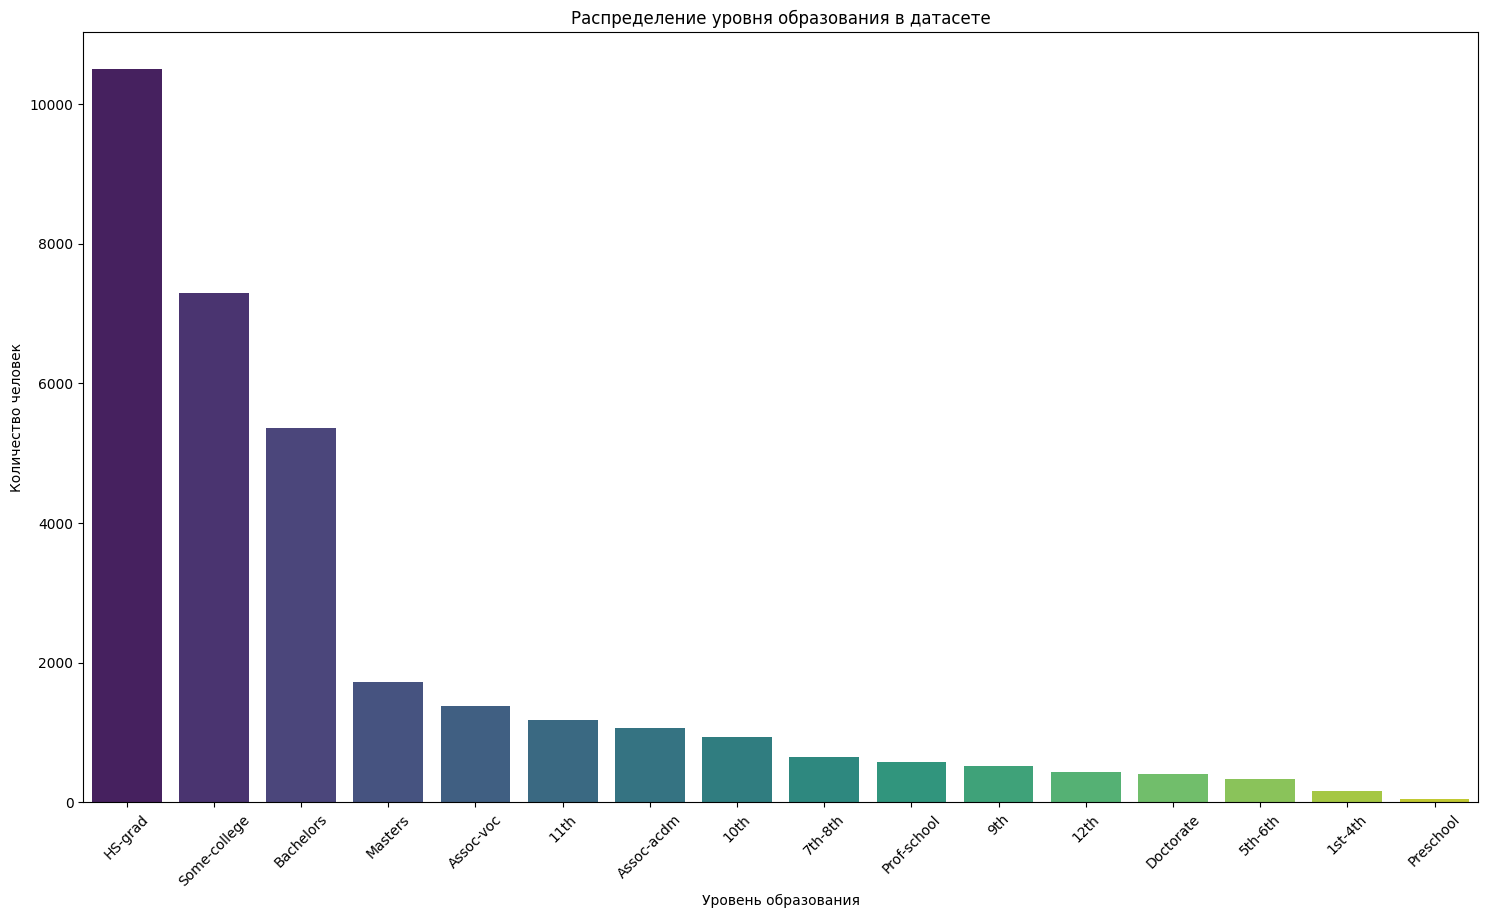

Самый распространённый уровень образования: HS-grad


In [ ]:
# Считаем количество людей каждого уровня образования
edu_counts = df['education'].value_counts()

print("Распределение по уровню образования:\n", edu_counts)

# Строим столбчатую диаграмму
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette='viridis')

plt.xticks(rotation=45)
plt.xlabel('Уровень образования')
plt.ylabel('Количество человек')
plt.title('Распределение уровня образования в датасете')
plt.show()

# Вывод самого распространённого уровня образования:
most_common_education = edu_counts.idxmax()
print(f"Самый распространённый уровень образования: {most_common_education}")

Количество возрастных отрезков с более чем 1600 значениями: 4


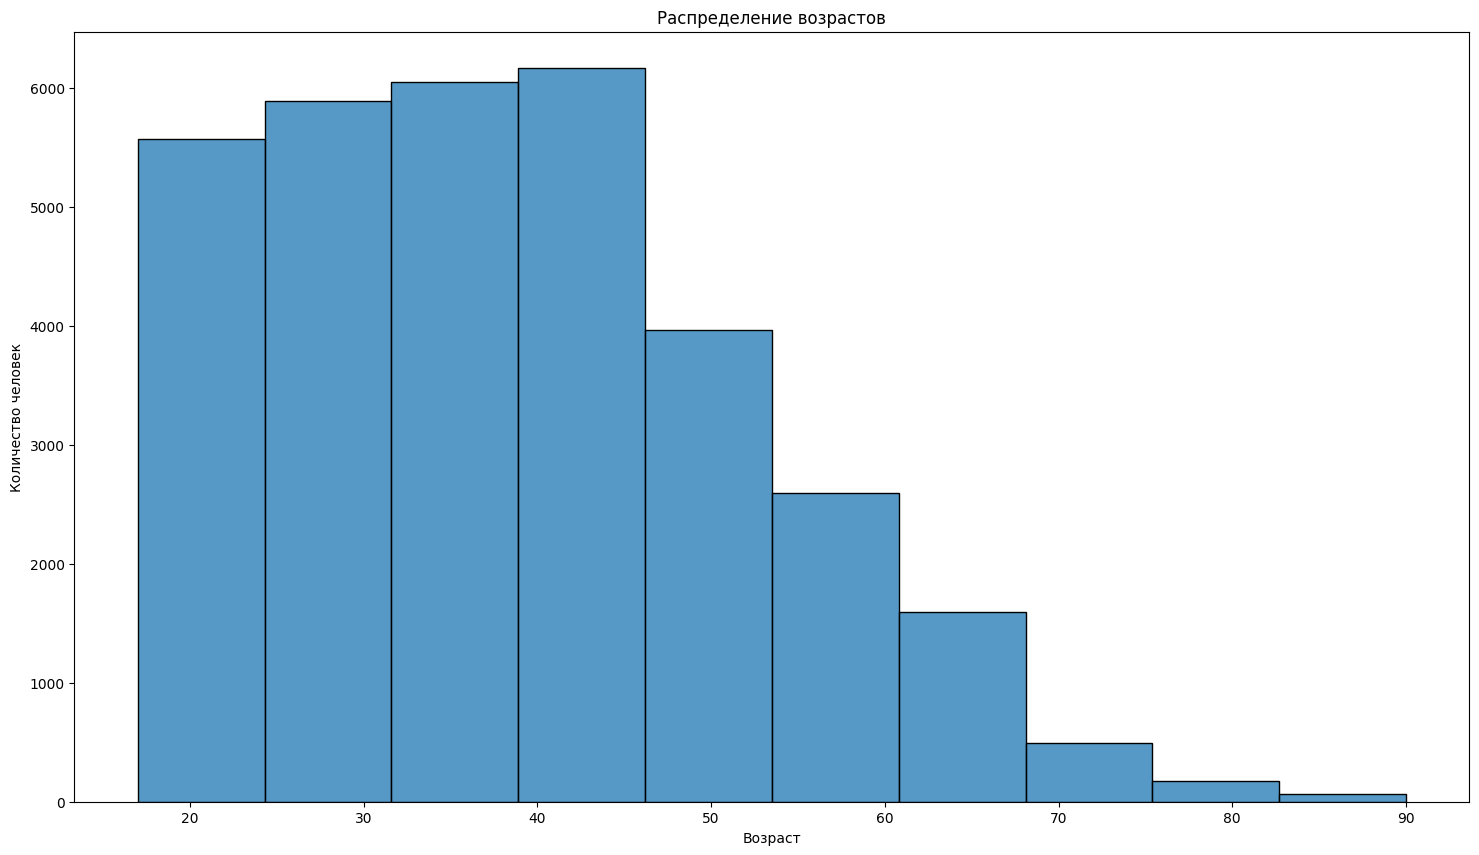

In [ ]:
# Используем np.histogram, чтобы получить counts и bin edges
counts, bin_edges = np.histogram(df['age'], bins='auto')

# Подсчёт, сколько отрезков (бинов) имеют более 1600 значений
bins_above_1600 = np.sum(counts > 1600)

print(f"Количество возрастных отрезков с более чем 1600 значениями: {bins_above_1600}")

# Строим график с помощью seaborn для визуализации
sns.histplot(df['age'], bins=10, kde=False)

plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.title('Распределение возрастов')
plt.show()